In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import NaN as NA
import re
import seaborn as sns
from operator import itemgetter, attrgetter

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

# Kaggle Ecommerce data

In [2]:
df1 = pd.read_csv('kaggle_Ecommerce.csv', parse_dates=['InvoiceDate'])
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [3]:
# 반품, 할인 등과 같은 Quantity가 음수일 경우 제외시킨다.
# 우리는 수익이 목표가 아니라 매출이 목표!
df1 = df1[df1['Quantity']>=0]

In [4]:
df = df1[['InvoiceDate','CustomerID','Sales']]
df['CustomerID']= df['CustomerID'].astype(str)
df

<ipython-input-4-27db33987e95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']= df['CustomerID'].astype(str)


,InvoiceDate,CustomerID,Sales
0,2010-12-01 08:26:00,17850.0,15.30
1,2010-12-01 08:26:00,17850.0,20.34
2,2010-12-01 08:26:00,17850.0,22.00
3,2010-12-01 08:26:00,17850.0,20.34
4,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...
541904,2011-12-09 12:50:00,12680.0,10.20
541905,2011-12-09 12:50:00,12680.0,12.60
541906,2011-12-09 12:50:00,12680.0,16.60
541907,2011-12-09 12:50:00,12680.0,16.60


In [5]:
df.columns = ['Order Date','Customer ID','Sales']
df['Order Date']=pd.to_datetime(df['Order Date'].dt.strftime('%Y-%m-%d'))
df

<ipython-input-5-5def7e25c726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date']=pd.to_datetime(df['Order Date'].dt.strftime('%Y-%m-%d'))


,Order Date,Customer ID,Sales
0,2010-12-01,17850.0,15.30
1,2010-12-01,17850.0,20.34
2,2010-12-01,17850.0,22.00
3,2010-12-01,17850.0,20.34
4,2010-12-01,17850.0,20.34
...,...,...,...
541904,2011-12-09,12680.0,10.20
541905,2011-12-09,12680.0,12.60
541906,2011-12-09,12680.0,16.60
541907,2011-12-09,12680.0,16.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Order Date   531285 non-null  datetime64[ns]
 1   Customer ID  531285 non-null  object        
 2   Sales        531285 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.2+ MB


## 1. 월별 구매건수/구매금액(합산) 그래프 그리기

In [7]:
df_2 = pd.DataFrame(df.groupby('Order Date').count()['Customer ID'])
df_2['매출'] = df.groupby('Order Date').sum()['Sales']
df_2.columns = ['구매건수','매출']
df_2

,구매건수,매출
Order Date,,
2010-12-01,3081,58960.79
2010-12-02,2064,47748.38
2010-12-03,2160,46943.71
2010-12-05,2709,31774.95
2010-12-06,3822,54830.46
...,...,...
2011-12-05,5302,88741.96
2011-12-06,3263,56713.21
2011-12-07,2396,75439.16


In [8]:
df3 = df_2.resample('M').sum()
df3

,구매건수,매출
Order Date,,
2010-12-31,41683,823746.140
2011-01-31,34350,691364.560
2011-02-28,27184,523631.890
2011-03-31,35915,717639.360
2011-04-30,29171,537808.621
2011-05-31,36292,770536.020
2011-06-30,36056,761739.900
2011-07-31,38716,719221.191
2011-08-31,34566,737014.260


In [9]:
g3 = df3.groupby(pd.Grouper( freq='Y'))
dfs3 = [group for _,group in g3]
dfs3

[             구매건수         매출
 Order Date                  
 2010-12-31  41683  823746.14,
              구매건수           매출
 Order Date                    
 2011-01-31  34350   691364.560
 2011-02-28  27184   523631.890
 2011-03-31  35915   717639.360
 2011-04-30  29171   537808.621
 2011-05-31  36292   770536.020
 2011-06-30  36056   761739.900
 2011-07-31  38716   719221.191
 2011-08-31  34566   737014.260
 2011-09-30  49323  1058590.172
 2011-10-31  59396  1154979.300
 2011-11-30  83498  1509496.330
 2011-12-31  25135   638792.680]

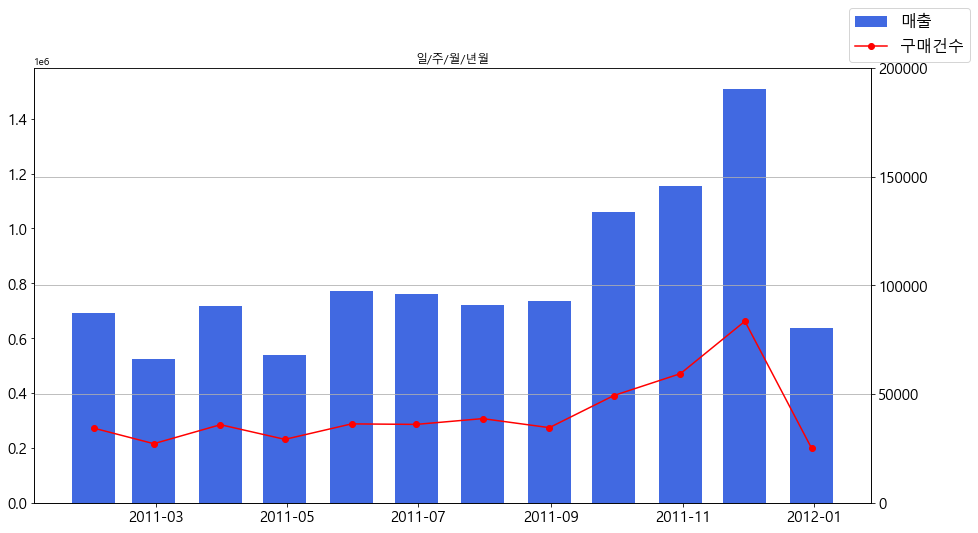

In [10]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots(1,1)
plt.xticks(fontsize=15)

# dfs3[i]의 i를 바꾸면서 그림가능
ax1.bar(dfs3[1].index, dfs3[1]['매출'], color='royalblue',label='매출', width=20) 
ax1.tick_params(axis = 'y', labelsize =15)
ax2 = ax1.twinx()
ax2.plot(dfs3[1].index, dfs3[1]['구매건수'],color='red',label='구매건수', marker='o')
ax2.set_yticks([i*50000 for i in range(5)])
ax2.tick_params(axis = 'y', labelsize =15)


plt.rc('legend', fontsize=16)
plt.grid(True, axis='y')
plt.title('일/주/월/년월')
fig.legend()
plt.show()

## 2. 누적 구매횟수별 분석 -> Stacked Bar 로 시각화

In [11]:
# 고객 아이디가 없는 비회원은 제외시킨다.
df2 = df[df['Customer ID']!='nan']

In [12]:
df_user = pd.DataFrame(df2.groupby(['Customer ID']).count()['Sales'])
df_user['매출'] = df2.groupby(['Customer ID']).sum()['Sales']
df_user.columns = ['유저별 총 구매횟수','매출']
df_user

,유저별 총 구매횟수,매출
Customer ID,,
12346.0,1,77183.60
12347.0,182,4310.00
12348.0,31,1797.24
12349.0,73,1757.55
12350.0,17,334.40
...,...,...
18280.0,10,180.60
18281.0,7,80.82
18282.0,12,178.05


In [13]:
# 원본데이터와 합친다.
df_user_final = pd.merge(df,df_user, on=['Customer ID']) # 고객명이 키가 된다.
df_user_final.drop(['매출'],axis=1,inplace=True) # 매출 컬럼은 삭제
df_user_final['주문년도/월'] = df_user_final['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
df_user_final['주문년도/월'] = pd.to_datetime(df_user_final['주문년도/월'])
df_user_final

,Order Date,Customer ID,Sales,유저별 총 구매횟수,주문년도/월
0,2010-12-01,17850.0,15.30,297,2010-12-01
1,2010-12-01,17850.0,20.34,297,2010-12-01
2,2010-12-01,17850.0,22.00,297,2010-12-01
3,2010-12-01,17850.0,20.34,297,2010-12-01
4,2010-12-01,17850.0,20.34,297,2010-12-01
...,...,...,...,...,...
397919,2011-12-09,12713.0,15.00,38,2011-12-01
397920,2011-12-09,12713.0,10.20,38,2011-12-01
397921,2011-12-09,12713.0,10.20,38,2011-12-01
397922,2011-12-09,12713.0,24.96,38,2011-12-01


In [14]:
df_user_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 397923
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Order Date   397924 non-null  datetime64[ns]
 1   Customer ID  397924 non-null  object        
 2   Sales        397924 non-null  float64       
 3   유저별 총 구매횟수   397924 non-null  int64         
 4   주문년도/월       397924 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 18.2+ MB


In [15]:
df_user2 = pd.DataFrame(df_user_final.groupby(['주문년도/월','유저별 총 구매횟수']).sum()['Sales'])
df_user3 = df_user2.unstack().T
df_user3 = df_user3.fillna(0) # 결측치 0 대입
df_user3

주문년도/월            2010-12-01  2011-01-01  2011-02-01  2011-03-01  2011-04-01  \
      유저별 총 구매횟수                                                               
Sales 1              1361.79    78214.42     1003.97      398.60      303.55   
      2              3228.56      789.00     3937.32     1744.42     2272.98   
      3              1561.05      784.40      225.58     1729.47      315.60   
      4              4737.13     2656.96      741.94     1167.29      232.90   
      5              1177.90     2341.50     1870.25     4079.14     1621.17   
...                      ...         ...         ...         ...         ...   
      2700           1246.66     1499.17     1177.40     1277.61      905.53   
      4596           4228.13      418.77      389.64     1179.37     1100.37   
      5111              0.00        0.00        0.00        0.00        0.00   
      5677           7737.94     5129.47     1471.19    10452.18     4572.32   
      7847           2473.07     1953.78     1017.74     1475.30     1769.71   

주문년도/월            2011-05-01  2011-06-01  2011-07-01  2011-08-01  2011-09-01  \
      유저별 총 구매횟수                                                               
Sales 1              5589.76      551.00     1220.53      330.60     2469.42   
      2               206.20      581.92      231.27     3154.63     1805.70   
      3               876.50    41361.80      329.07      168.00      750.66   
      4              1549.42      272.88     3768.07     2230.02      498.28   
      5              1040.65      400.71      269.20     1153.65     3697.19   
...                      ...         ...         ...         ...         ...   
      2700            675.39      936.28      813.38      797.96      660.53   
      4596           2234.50     2006.26     1113.27      898.24     6148.84   
      5111              0.00        0.00        0.00       21.84     9264.86   
      5677           9436.68    10078.20    13463.58    12095.49    21271.97   
      7847           2840.02     3168.84     4133.15     3533.43     3686.68   

주문년도/월            2011-10-01  2011-11-01  2011-12-01  
      유저별 총 구매횟수                                      
Sales 1              1391.46      953.16     4169.00  
      2               318.62     1463.02      437.50  
      3               408.55     4364.26   168562.59  
      4               373.66     6042.83      264.60  
      5              1862.77     2041.24      205.00  
...                      ...         ...         ...  
      2700            684.62     1126.41      355.71  
      4596           2292.84    10639.23     1070.27  
      5111          19114.33    27827.78     8935.98  
      5677          18416.39    22720.73     6978.92  
      7847           5239.96     7143.58     2556.31  

[461 rows x 13 columns]

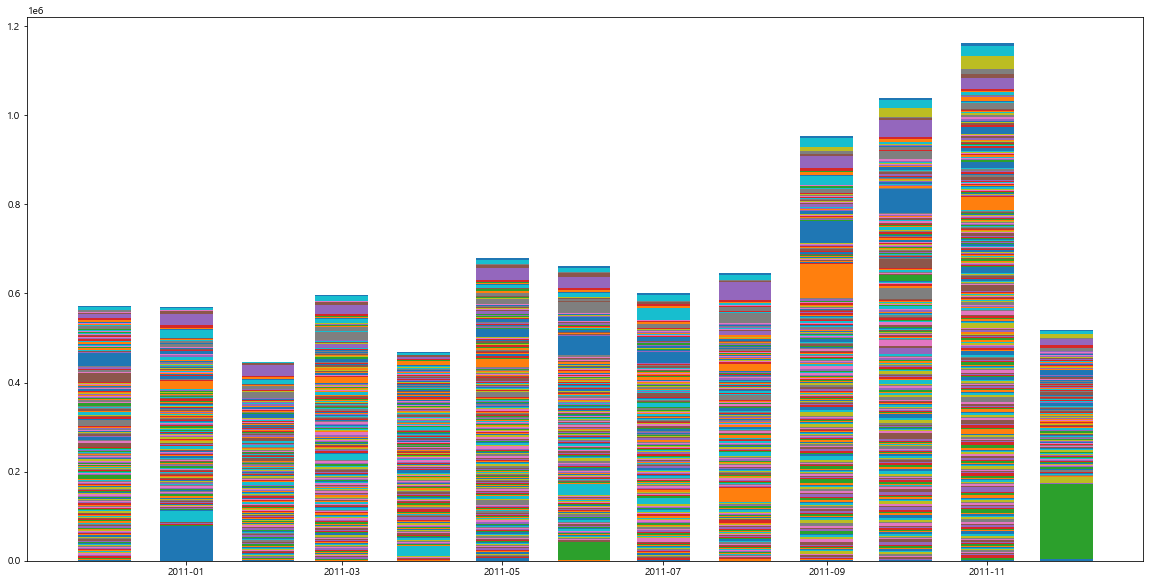

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
width=20
ax.bar(df_user3.columns, df_user3.iloc[0,:],width=width,label='1번 구매자')
for i in range(1,461) :
    ax.bar(df_user3.columns, df_user3.iloc[i,:],width=width, bottom=df_user3.iloc[0:i,:].sum(axis=0))

plt.show()

## 3. 구매횟수별 분석 -> Stacked Bar 로 시각화
- 2번에서는 유저당 누적 등장횟수로 그림을 그렸다면, 여기서는 등장할때마다 번호를 매겨 매 구매 건에 대해 랭크를 매김

In [36]:
df2

,Order Date,Customer ID,Sales,Rank,주문년도/월
0,2010-12-01,17850.0,15.30,1.0,2010-12-01
1,2010-12-01,17850.0,20.34,1.0,2010-12-01
2,2010-12-01,17850.0,22.00,1.0,2010-12-01
3,2010-12-01,17850.0,20.34,1.0,2010-12-01
4,2010-12-01,17850.0,20.34,1.0,2010-12-01
...,...,...,...,...,...
541904,2011-12-09,12680.0,10.20,38.0,2011-12-01
541905,2011-12-09,12680.0,12.60,38.0,2011-12-01
541906,2011-12-09,12680.0,16.60,38.0,2011-12-01
541907,2011-12-09,12680.0,16.60,38.0,2011-12-01


In [17]:
df2['Rank'] = df2.groupby('Customer ID')['Order Date'].rank(method='min')
df2

<ipython-input-17-dbe0ee53969f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rank'] = df2.groupby('Customer ID')['Order Date'].rank(method='min')


,Order Date,Customer ID,Sales,Rank
0,2010-12-01,17850.0,15.30,1.0
1,2010-12-01,17850.0,20.34,1.0
2,2010-12-01,17850.0,22.00,1.0
3,2010-12-01,17850.0,20.34,1.0
4,2010-12-01,17850.0,20.34,1.0
...,...,...,...,...
541904,2011-12-09,12680.0,10.20,38.0
541905,2011-12-09,12680.0,12.60,38.0
541906,2011-12-09,12680.0,16.60,38.0
541907,2011-12-09,12680.0,16.60,38.0


In [18]:
df2['주문년도/월'] = df2['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
df2['주문년도/월'] = pd.to_datetime( df2['주문년도/월'])
df2

<ipython-input-18-295bf6737d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['주문년도/월'] = df2['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
<ipython-input-18-295bf6737d1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['주문년도/월'] = pd.to_datetime( df2['주문년도/월'])


,Order Date,Customer ID,Sales,Rank,주문년도/월
0,2010-12-01,17850.0,15.30,1.0,2010-12-01
1,2010-12-01,17850.0,20.34,1.0,2010-12-01
2,2010-12-01,17850.0,22.00,1.0,2010-12-01
3,2010-12-01,17850.0,20.34,1.0,2010-12-01
4,2010-12-01,17850.0,20.34,1.0,2010-12-01
...,...,...,...,...,...
541904,2011-12-09,12680.0,10.20,38.0,2011-12-01
541905,2011-12-09,12680.0,12.60,38.0,2011-12-01
541906,2011-12-09,12680.0,16.60,38.0,2011-12-01
541907,2011-12-09,12680.0,16.60,38.0,2011-12-01


In [19]:
df3 = df2.groupby(['주문년도/월','Rank']).sum()['Sales'].to_frame().unstack().T
df3 = df3.droplevel(0, axis=0) # multi인덱스 제거
df3 = df3.fillna(0) # 결측치 = 0
df3

주문년도/월,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
Rank,,,,,,,,,,,,,
1.0,399376.41,282172.71,150560.99,191090.71,113789.441,116644.42,132135.24,70575.451,77127.63,147242.451,154046.57,121103.52,27059.46
2.0,8132.71,5990.57,3097.74,3028.41,1111.860,3803.20,1836.76,4660.320,476.80,3348.670,441.54,865.62,105.60
3.0,4721.70,1613.97,5212.18,2155.41,245.850,2279.64,2486.74,1234.410,1363.02,2142.970,1005.17,3707.56,168653.57
4.0,3496.89,37129.65,3245.61,1094.70,945.720,1258.90,1536.14,5240.140,1342.25,2696.770,15876.58,5867.08,15.00
5.0,1096.42,6446.01,1406.01,5167.48,1905.780,2897.34,1500.46,2455.140,2067.30,3302.340,835.37,1453.63,512.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7219.0,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.00,775.22,0.00
7377.0,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.00,633.38
7502.0,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.00,113.79


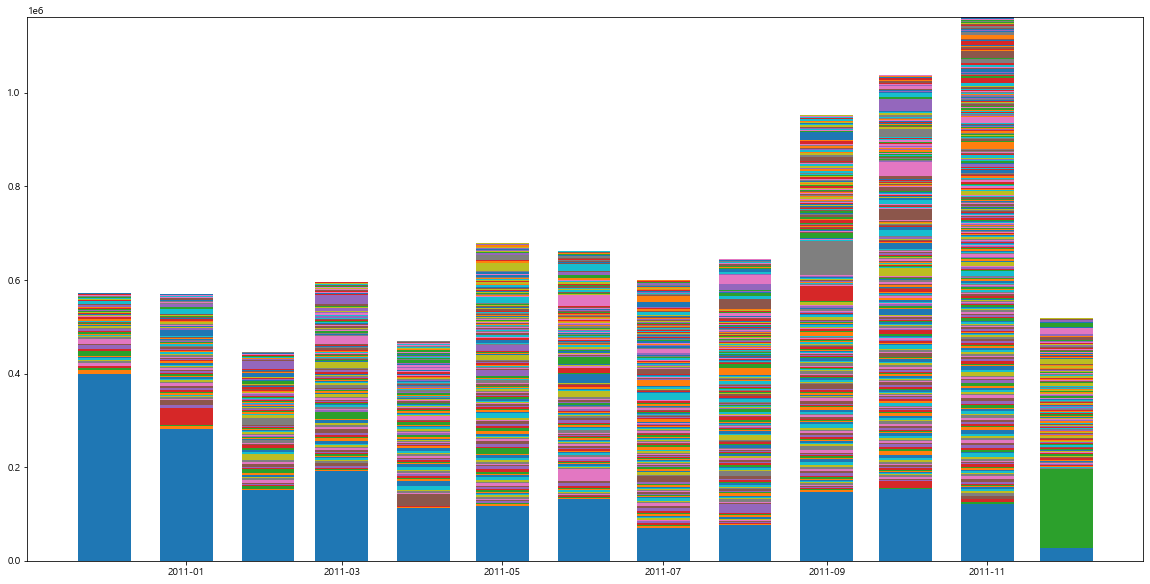

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
width=20
ax.bar(df3.columns, df3.iloc[0,:],width=width,label='1번 구매자')
for i in range(1,1229) :
    ax.bar(df3.columns, df3.iloc[i,:], bottom=df3.iloc[0:i,:].sum(axis=0), width=width, label=f'{i+1}번 구매자')
    
plt.show()

## 4. 코호트 재구매율

In [37]:
df2

,Order Date,Customer ID,Sales,Rank,주문년도/월
0,2010-12-01,17850.0,15.30,1.0,2010-12-01
1,2010-12-01,17850.0,20.34,1.0,2010-12-01
2,2010-12-01,17850.0,22.00,1.0,2010-12-01
3,2010-12-01,17850.0,20.34,1.0,2010-12-01
4,2010-12-01,17850.0,20.34,1.0,2010-12-01
...,...,...,...,...,...
541904,2011-12-09,12680.0,10.20,38.0,2011-12-01
541905,2011-12-09,12680.0,12.60,38.0,2011-12-01
541906,2011-12-09,12680.0,16.60,38.0,2011-12-01
541907,2011-12-09,12680.0,16.60,38.0,2011-12-01


In [21]:
df_rank_first = df2[df2['Rank']==1][['Customer ID','주문년도/월']]
df_rank_first

,Customer ID,주문년도/월
0,17850.0,2010-12-01
1,17850.0,2010-12-01
2,17850.0,2010-12-01
3,17850.0,2010-12-01
4,17850.0,2010-12-01
...,...,...
541801,12713.0,2011-12-01
541802,12713.0,2011-12-01
541803,12713.0,2011-12-01
541804,12713.0,2011-12-01


In [25]:
df_total = pd.merge(df2,df_rank_first,on=['Customer ID'])
df_total = df_total[['Customer ID','주문년도/월_x','주문년도/월_y']]

In [26]:
df_total

,Customer ID,주문년도/월_x,주문년도/월_y
0,17850.0,2010-12-01,2010-12-01
1,17850.0,2010-12-01,2010-12-01
2,17850.0,2010-12-01,2010-12-01
3,17850.0,2010-12-01,2010-12-01
4,17850.0,2010-12-01,2010-12-01
...,...,...,...
15504800,12713.0,2011-12-01,2011-12-01
15504801,12713.0,2011-12-01,2011-12-01
15504802,12713.0,2011-12-01,2011-12-01
15504803,12713.0,2011-12-01,2011-12-01


In [27]:
df_total.columns = ['Customer ID','Order Date','First 0rder Date']
df_total

,Customer ID,Order Date,First 0rder Date
0,17850.0,2010-12-01,2010-12-01
1,17850.0,2010-12-01,2010-12-01
2,17850.0,2010-12-01,2010-12-01
3,17850.0,2010-12-01,2010-12-01
4,17850.0,2010-12-01,2010-12-01
...,...,...,...
15504800,12713.0,2011-12-01,2011-12-01
15504801,12713.0,2011-12-01,2011-12-01
15504802,12713.0,2011-12-01,2011-12-01
15504803,12713.0,2011-12-01,2011-12-01


In [28]:
df_total['Month']= (df_total['Order Date'].dt.year - df_total['First 0rder Date'].dt.year)*12 + (df_total['Order Date'].dt.month - df_total['First 0rder Date'].dt.month)
df_total.head(40)

,Customer ID,Order Date,First 0rder Date,Month
0,17850.0,2010-12-01,2010-12-01,0
1,17850.0,2010-12-01,2010-12-01,0
2,17850.0,2010-12-01,2010-12-01,0
3,17850.0,2010-12-01,2010-12-01,0
4,17850.0,2010-12-01,2010-12-01,0
5,17850.0,2010-12-01,2010-12-01,0
6,17850.0,2010-12-01,2010-12-01,0
7,17850.0,2010-12-01,2010-12-01,0
8,17850.0,2010-12-01,2010-12-01,0
9,17850.0,2010-12-01,2010-12-01,0


In [29]:
grouped2 = df_total.groupby(['First 0rder Date','Month'])

In [30]:
# 각 유저별로 구한다.
cohort2 = grouped2['Customer ID'].nunique() 
cohort2.head(10)

First 0rder Date  Month
2010-12-01        0        885
                  1        324
                  2        286
                  3        340
                  4        321
                  5        352
                  6        321
                  7        309
                  8        313
                  9        350
Name: Customer ID, dtype: int64

In [31]:
cohort2 = cohort2.to_frame() # 데이터프레임화
cohort2

Customer ID
First 0rder Date Month             
2010-12-01       0              885
                 1              324
                 2              286
                 3              340
                 4              321
...                             ...
2011-10-01       1               86
                 2               41
2011-11-01       0              324
                 1               36
2011-12-01       0               41

[91 rows x 1 columns]

In [32]:
cohort2.reset_index(inplace=True) # 인덱스 재설정

In [33]:
# 피벗을 이용하여 코호트 재구매율 표 구하기
cohort2 = cohort2.pivot(index='First 0rder Date', columns = 'Month')
cohort2

Customer ID                                                   \
Month                     0      1      2      3      4      5      6      7    
First 0rder Date                                                                
2010-12-01             885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01             417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01             380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01             452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01             300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01             284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01             242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01             188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01             169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01             299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01             358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01             324.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01              41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                     
Month                8      9      10     11     12  
First 0rder Date                                     
2010-12-01        313.0  350.0  331.0  445.0  235.0  
2011-01-01        125.0  136.0  152.0   49.0    NaN  
2011-02-01         94.0  116.0   26.0    NaN    NaN  
2011-03-01        126.0   39.0    NaN    NaN    NaN  
2011-04-01         22.0    NaN    NaN    NaN    NaN  
2011-05-01          NaN    NaN    NaN    NaN    NaN  
2011-06-01          NaN    NaN    NaN    NaN    NaN  
2011-07-01          NaN    NaN    NaN    NaN    NaN  
2011-08-01          NaN    NaN    NaN    NaN    NaN  
2011-09-01          NaN    NaN    NaN    NaN    NaN  
2011-10-01          NaN    NaN    NaN    NaN    NaN  
2011-11-01          NaN    NaN    NaN    NaN    NaN  
2011-12-01          NaN    NaN    NaN    NaN    NaN

In [34]:
# 확률 계산
user_retention2 = cohort2.div(cohort2.iloc[:,0], axis=0)
user_retention2

Customer ID                                          \
Month                     0         1         2         3         4    
First 0rder Date                                                       
2010-12-01               1.0  0.366102  0.323164  0.384181  0.362712   
2011-01-01               1.0  0.220624  0.266187  0.230216  0.321343   
2011-02-01               1.0  0.186842  0.186842  0.284211  0.271053   
2011-03-01               1.0  0.150442  0.252212  0.199115  0.223451   
2011-04-01               1.0  0.213333  0.203333  0.210000  0.196667   
2011-05-01               1.0  0.190141  0.172535  0.172535  0.207746   
2011-06-01               1.0  0.173554  0.157025  0.264463  0.231405   
2011-07-01               1.0  0.180851  0.207447  0.223404  0.271277   
2011-08-01               1.0  0.207101  0.248521  0.242604  0.124260   
2011-09-01               1.0  0.234114  0.301003  0.113712       NaN   
2011-10-01               1.0  0.240223  0.114525       NaN       NaN   
2011-11-01               1.0  0.111111       NaN       NaN       NaN   
2011-12-01               1.0       NaN       NaN       NaN       NaN   

                                                                              \
Month                   5         6         7         8         9         10   
First 0rder Date                                                               
2010-12-01        0.397740  0.362712  0.349153  0.353672  0.395480  0.374011   
2011-01-01        0.287770  0.247002  0.242206  0.299760  0.326139  0.364508   
2011-02-01        0.247368  0.252632  0.278947  0.247368  0.305263  0.068421   
2011-03-01        0.168142  0.267699  0.230088  0.278761  0.086283       NaN   
2011-04-01        0.226667  0.216667  0.260000  0.073333       NaN       NaN   
2011-05-01        0.232394  0.264085  0.095070       NaN       NaN       NaN   
2011-06-01        0.334711  0.095041       NaN       NaN       NaN       NaN   
2011-07-01        0.111702       NaN       NaN       NaN       NaN       NaN   
2011-08-01             NaN       NaN       NaN       NaN       NaN       NaN   
2011-09-01             NaN       NaN       NaN       NaN       NaN       NaN   
2011-10-01             NaN       NaN       NaN       NaN       NaN       NaN   
2011-11-01             NaN       NaN       NaN       NaN       NaN       NaN   
2011-12-01             NaN       NaN       NaN       NaN       NaN       NaN   

                                      
Month                   11        12  
First 0rder Date                      
2010-12-01        0.502825  0.265537  
2011-01-01        0.117506       NaN  
2011-02-01             NaN       NaN  
2011-03-01             NaN       NaN  
2011-04-01             NaN       NaN  
2011-05-01             NaN       NaN  
2011-06-01             NaN       NaN  
2011-07-01             NaN       NaN  
2011-08-01             NaN       NaN  
2011-09-01             NaN       NaN  
2011-10-01             NaN       NaN  
2011-11-01             NaN       NaN  
2011-12-01             NaN       NaN

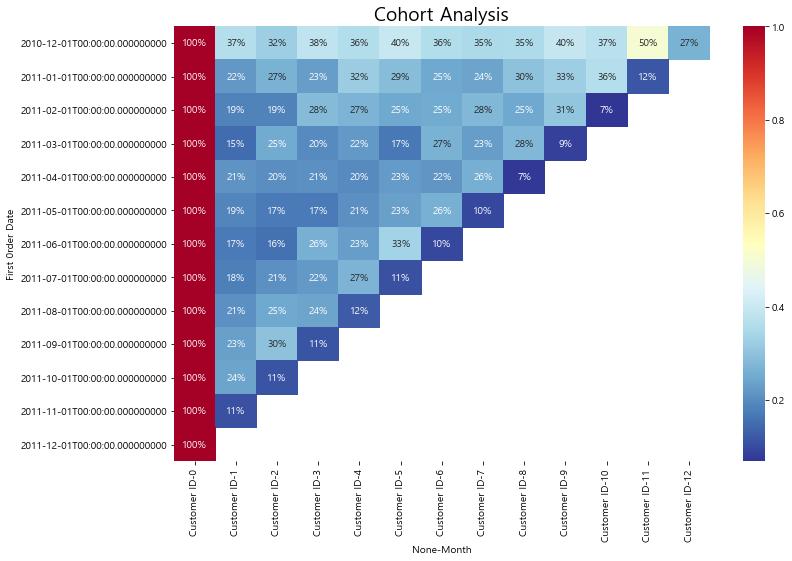

In [35]:
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('RdYlBu_r')
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention2, annot=True, fmt='.0%', cmap=cmap)
plt.show()